In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

SHAP Values Shape: (1, 5, 15)
Interaction Matrix Shape: (5, 15)
Updated Interaction Matrix Shape: (15, 15)
Sorted Indices: [ 4  3  2  1  0 14 13 12 11 10  9  8  7  6  5]
Sorted Interaction Matrix Shape: (15, 15)


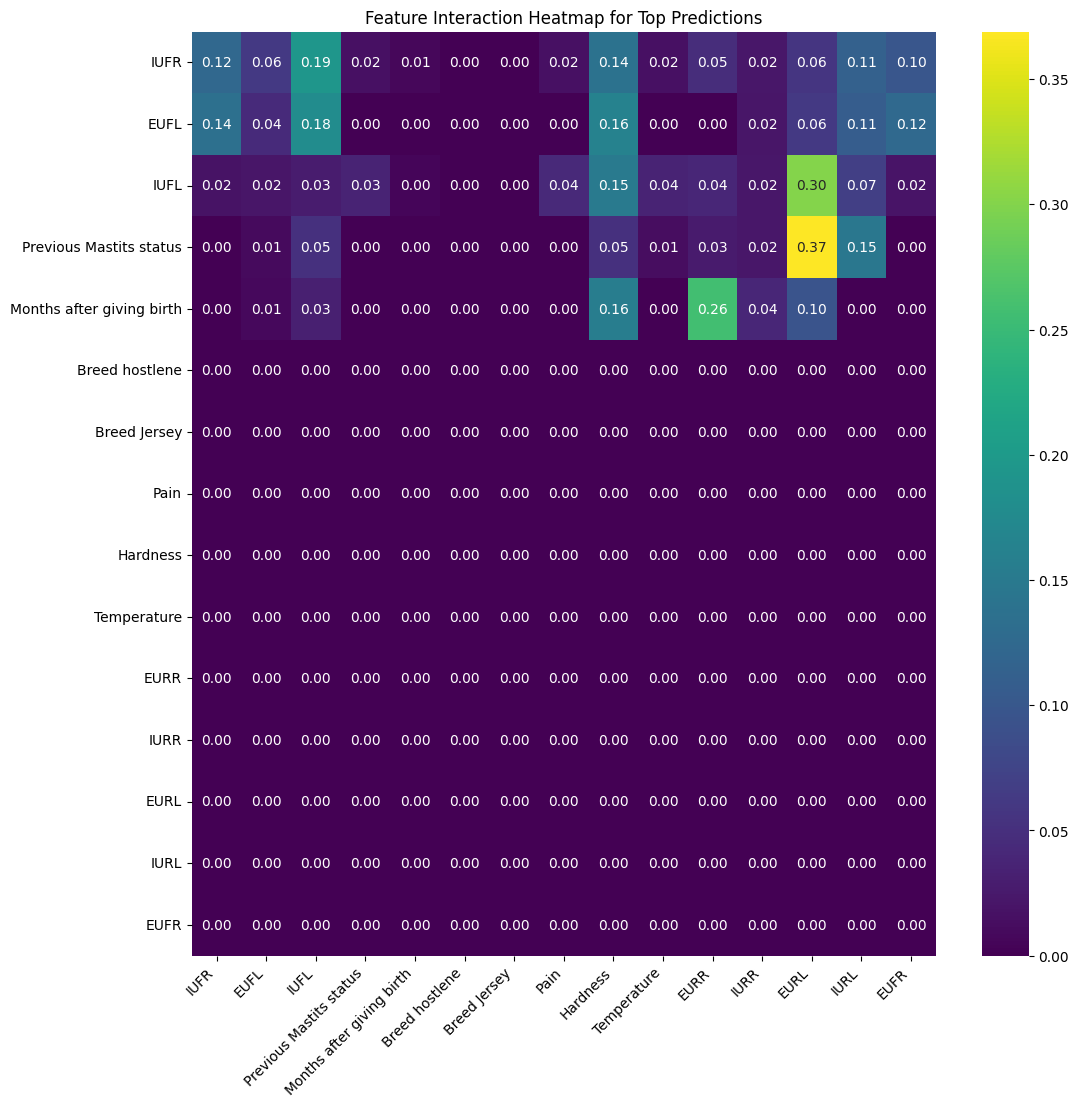

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Example feature names (replace with actual feature names if available)
feature_names = ['Months after giving birth', 'Previous Mastits status', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 
                 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature', 'Hardness', 'Pain', 'Breed Jersey', 'Breed hostlene']

# Sample SHAP values (replace this with your actual SHAP values)
shap_values = np.array([
    [[0, 0, 0.03192641, 0.00782307, 0, 0, 0, 0.09512947, 0.03906814, 0.25685355, 0, 0.15512901, 0, 0, 0],
     [0, 0, 0.05082025, 0.00999446, 0, 0, 0.14560062, 0.36893718, 0.02206213, 0.02687887, 0.01233808, -0.05146047, 0, 0, 0],
     [0.00452053, 0.03482086, 0.0283639, 0.02085395, 0.01743837, 0.01924703, 0.06873251, 0.30058189, -0.02180237, 0.03923384, -0.03568585, 0.15100439, -0.04213793, 0, 0],
     [0, 0, 0.17838748, 0.04410173, 0.13539444, -0.12443987, 0.10736341, 0.06129026, 0.02028389, 0, 0, 0.16361043, 0, 0, 0],
     [0.00596177, 0.01525119, 0.19372157, 0.06140285, 0.12269745, -0.09845727, 0.11279211, 0.05757866, 0.02263279, -0.04647302, -0.01574117, 0.1392429, 0.01538194, 0, 0]]
])

# Verify the shape of shap_values
print("SHAP Values Shape:", shap_values.shape)

# Ensure shap_values is a 3D array
if len(shap_values.shape) == 1:
    shap_values = shap_values[0]

# Calculate interaction matrix by summing the absolute SHAP values
interaction_matrix = np.abs(shap_values).sum(axis=0)

# Verify the shape of the interaction matrix
print("Interaction Matrix Shape:", interaction_matrix.shape)

# Ensure the interaction matrix covers all features
if interaction_matrix.shape[0] != len(feature_names):
    print("Warning: Mismatch between interaction matrix and feature names")
    # Padding or handling mismatch if necessary
    if interaction_matrix.shape[0] < len(feature_names):
        # Pad the interaction matrix with zeros to match the feature names length
        padded_interaction_matrix = np.zeros((len(feature_names), len(feature_names)))
        padded_interaction_matrix[:interaction_matrix.shape[0], :interaction_matrix.shape[1]] = interaction_matrix
        interaction_matrix = padded_interaction_matrix

# Verify the updated shape of the interaction matrix
print("Updated Interaction Matrix Shape:", interaction_matrix.shape)

# Sort the interaction matrix for better visualization
sorted_indices = np.argsort(interaction_matrix.sum(axis=1))[::-1]
sorted_interaction_matrix = interaction_matrix[sorted_indices][:, sorted_indices]

# Debug: Print sorted indices and interaction matrix
print("Sorted Indices:", sorted_indices)
print("Sorted Interaction Matrix Shape:", sorted_interaction_matrix.shape)

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(sorted_interaction_matrix, annot=True, fmt=".2f", xticklabels=np.array(feature_names)[sorted_indices], yticklabels=np.array(feature_names)[sorted_indices], cmap="viridis")
plt.title("Feature Interaction Heatmap for Top Predictions")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
